In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [9]:
input_file=('cadence_field1000.csv')

In [10]:
df=pd.read_csv(input_file,index_col=False)

In [11]:
df.head()

,Unnamed: 0,obshistid,nights,expdate,expmjd,airmass,filter,finseeing,transparency,filtskybrightness,fiveSigmaDepth,rawseeing,humidity
0,0,127633,173,14965194,59753.208268,1.370996,g,1.160634,0.25,21.732956,24.241311,0.704040,0.0
1,1,127670,173,14966692,59753.225609,1.274001,g,1.303756,0.25,21.791891,24.160844,0.859973,0.0
2,2,136947,189,16353504,59769.276675,1.025141,z,0.695528,0.00,19.037479,23.215870,0.504610,0.0
3,3,136993,189,16355480,59769.299544,1.012049,z,0.659361,0.00,19.223263,23.364350,0.462390,0.0
4,4,137990,190,16439213,59770.268672,1.030291,y,0.782293,0.00,17.300000,21.767917,0.633086,0.0


# Spread of filter among nights

In [12]:
df1=df[['nights','filter']]

In [16]:
#df1

In [14]:
nbins=df1.nights.max()-df1.nights.min()

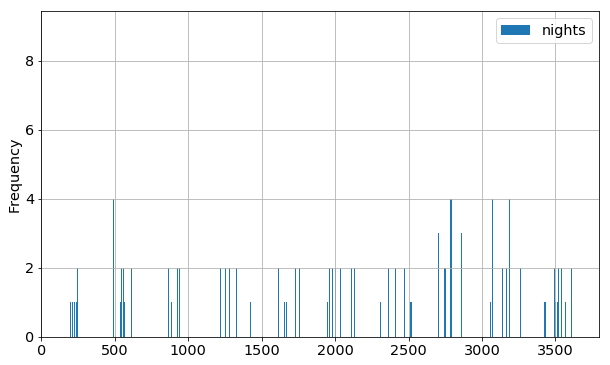

In [15]:
df1.plot.hist('nights',bins=nbins,grid=True)

# Plot Variable among filters

In [161]:
def PlotCadenceVariableForFilters(df,varname,nbins=50,theglobaltitle='title',thextitle='thextitle'):
    
    f, axarr = plt.subplots(2, 3,figsize=(15,8))
    
    #df.loc[(df['column_name'] == some_value) & df['other_column'].isin(some_values)]

    dfu=df.loc[df['filter']=='u']
    m,sig=dfu[varname].describe()['mean'],dfu[varname].describe()['std']
    thetitle='filt u m={:2.2f} $\sigma=$ {:2.2f}'.format(m,sig)
    x=dfu[varname].values
    axarr[0, 0].hist(x,bins=nbins,color='blue')
    axarr[0, 0].set_title(thetitle)
    axarr[0, 0].set_xlabel(thextitle)
    axarr[0, 0].grid(True)
    
    dfg=df.loc[df['filter']=='g']
    m,sig=dfg[varname].describe()['mean'],dfg[varname].describe()['std']
    thetitle='filt g : m={:2.2f} $\sigma=$ {:2.2f}'.format(m,sig)
    x=dfg[varname].values
    axarr[0, 1].hist(x,bins=nbins,color='green')
    axarr[0, 1].set_title(thetitle)
    axarr[0, 1].set_xlabel(thextitle)
    axarr[0, 1].grid(True)
    
    dfr=df.loc[df['filter']=='r']
    m,sig=dfr[varname].describe()['mean'],dfr[varname].describe()['std']
    thetitle='filt r : m={:2.2f} $\sigma=$ {:2.2f}'.format(m,sig)
    x=dfr[varname].values
    axarr[0, 2].hist(x,bins=nbins,color='red')
    axarr[0, 2].set_title(thetitle)
    axarr[0, 2].set_xlabel(thextitle)
    axarr[0, 2].grid(True)
    
    dfi=df.loc[df['filter']=='i']
    m,sig=dfi[varname].describe()['mean'],dfi[varname].describe()['std']
    thetitle='filt i : m={:2.2f} $\sigma=$ {:2.2f}'.format(m,sig)
    x=dfi[varname].values
    axarr[1, 0].hist(x,bins=nbins,color='orange')
    axarr[1, 0].set_title(thetitle)
    axarr[1, 0].set_xlabel(thextitle)
    axarr[1, 0].grid(True)
    
    dfz=df.loc[df['filter']=='z']
    m,sig=dfz[varname].describe()['mean'],dfz[varname].describe()['std']
    thetitle='filt z : m={:2.2f} $\sigma=$ {:2.2f}'.format(m,sig)
    x=dfz[varname].values
    axarr[1, 1].hist(x,bins=nbins,color='black')
    axarr[1, 1].set_title(thetitle)
    axarr[1, 1].set_xlabel(thextitle)
    axarr[1, 1].grid(True)
    
    dfy=df.loc[df['filter']=='y']
    m,sig=dfy[varname].describe()['mean'],dfy[varname].describe()['std']
    thetitle='filt y : m={:2.2f} $\sigma=$ {:2.2f}'.format(m,sig)
    x=dfy[varname].values
    axarr[1, 2].hist(x,bins=nbins,color='grey')
    axarr[1, 2].set_title(thetitle)
    axarr[1, 2].set_xlabel(thextitle)
    axarr[1, 2].grid(True)
    
      
    left  = 0.125  # the left side of the subplots of the figure
    right = 0.9    # the right side of the subplots of the figure
    bottom = 0.1   # the bottom of the subplots of the figure
    top = 0.9      # the top of the subplots of the figure
    wspace = 0.3   # the amount of width reserved for blank space between subplots
    hspace = 0.3   # the amount of height reserved for white space between subplots
    f.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=wspace)
    
    f.suptitle(theglobaltitle,fontsize=20,fontweight='bold')

# Sky Background

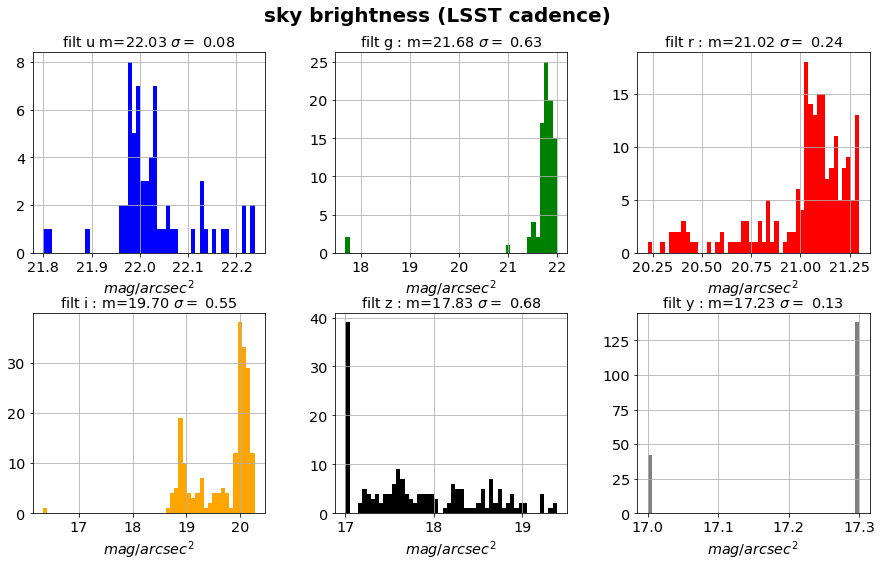

In [162]:
PlotCadenceVariableForFilters(df,'filtskybrightness',theglobaltitle='sky brightness (LSST cadence)',thextitle='$mag/arcsec^2$')

# Seeing

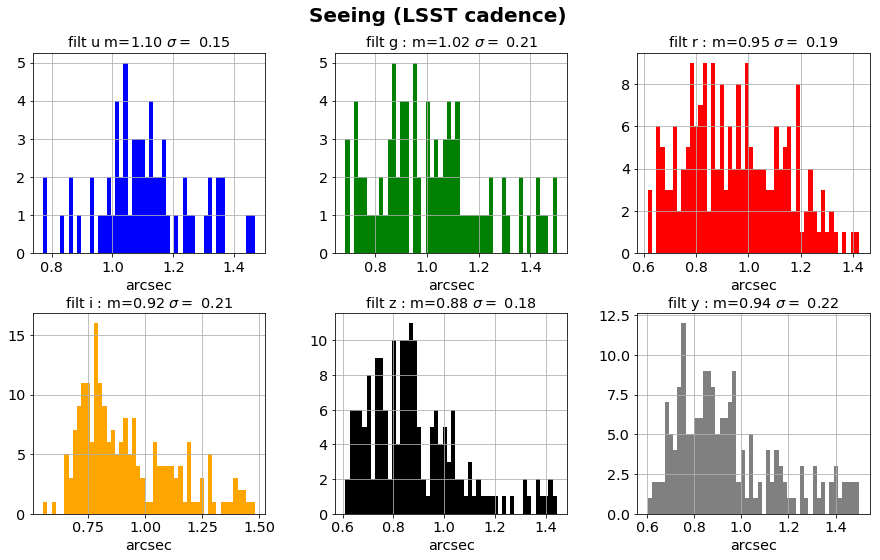

In [163]:
PlotCadenceVariableForFilters(df,'finseeing',theglobaltitle='Seeing (LSST cadence)',thextitle='arcsec')

# Five Sigma Depth

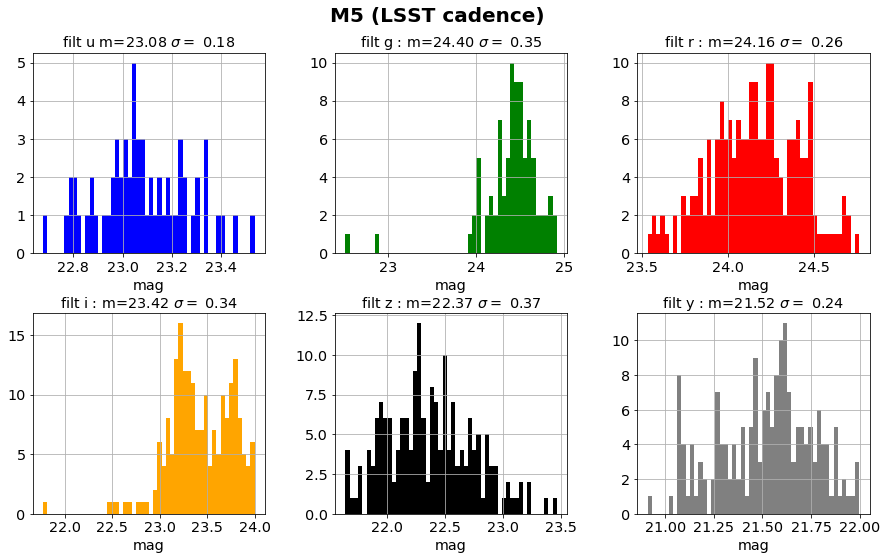

In [165]:
PlotCadenceVariableForFilters(df,'fiveSigmaDepth',theglobaltitle='M5 (LSST cadence)',thextitle='mag')

# Transparency

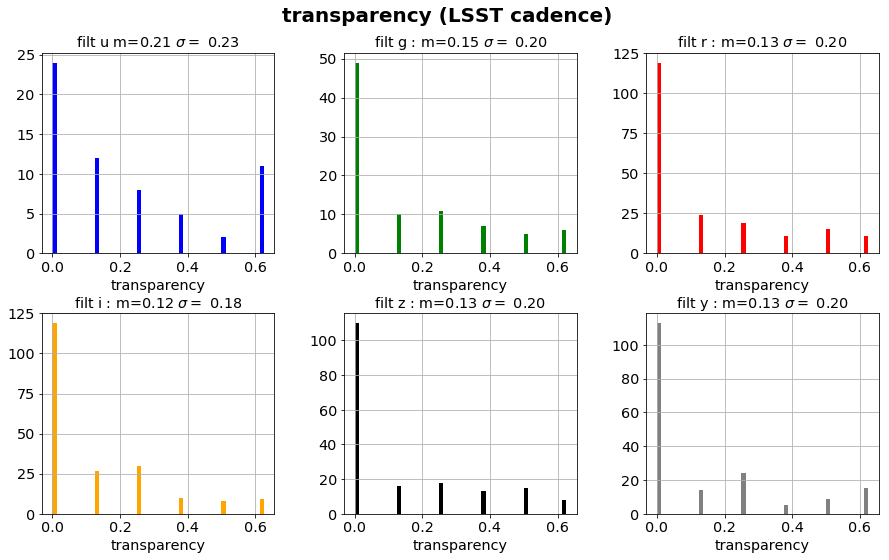

In [167]:
PlotCadenceVariableForFilters(df,'transparency',theglobaltitle='transparency (LSST cadence)',thextitle='transparency')